## Importing necessary packages

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Loading the diabetes dataset

In [13]:
diabetes = load_diabetes()

## Use two features (multi-variate regression)

In [14]:
X = diabetes.data[:, :2]  # Use BMI and age as features
y = diabetes.target

## Split the data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Feature scaling

In [16]:
X_train[0]

array([-0.00551455, -0.04464164])

In [17]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train[0]

array([-0.14076048, -0.94415495])

In [19]:
# Create a Multi-variate Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse_scaled = mean_squared_error(y_test, y_pred)
r2_scaled = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Standardized): {mse_scaled}')
print(f'R-squared (Standardized): {r2_scaled}')

Mean Squared Error (Standardized): 5504.204717607961
R-squared (Standardized): 0.004608772142643991


## Plot the actual and predicted values in 3D

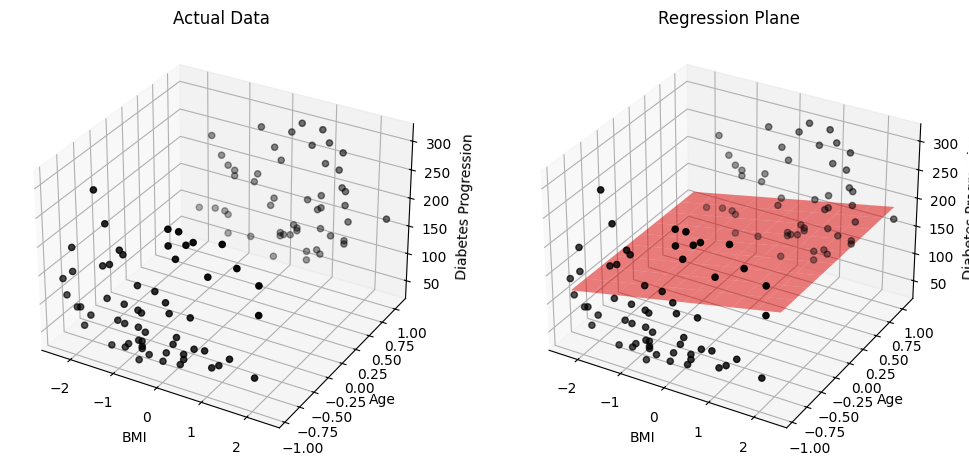

In [21]:
fig = plt.figure(figsize=(12, 6))

# Plotting the actual data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_test[:, 0], X_test[:, 1], y_test, color='black', label='Actual Data')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Age')
ax1.set_zlabel('Diabetes Progression')
ax1.set_title('Actual Data')

# Plotting the predicted values as a plane
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], y_test, color='black', label='Actual Data')

# Creating a meshgrid for the plane
x_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 10)
y_range = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 10)
x_plane, y_plane = np.meshgrid(x_range, y_range)
z_plane = model.predict(np.c_[x_plane.ravel(), y_plane.ravel()])

# Reshaping the predictions for the plot_surface function
z_plane = z_plane.reshape(x_plane.shape)

# Plotting the regression plane
ax2.plot_surface(x_plane, y_plane, z_plane, alpha=0.5, color='red', label='Regression Plane')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Age')
ax2.set_zlabel('Diabetes Progression')
ax2.set_title('Regression Plane')

plt.show()